# Compare average infection curves for a few output files from the `sim` routine.

See the file [running-simulations.md](../doc/running-simulations.md) in this repository for details on running simulations. The runs compared here are as follows:

```bash
python -m dissim.sim karate karate-pb-05-pd-320.csv -b 0.05 -d 0.320
python -m dissim.sim karate karate-pb-05-pd-256.csv -b 0.05 -d 0.256
python -m dissim.sim karate karate-pb-05-pd-204.csv -b 0.05 -d 0.204
python -m dissim.sim karate karate-pb-05-pd-163.csv -b 0.05 -d 0.163
python -m dissim.sim karate karate-pb-05-pd-131.csv -b 0.05 -d 0.131
python -m dissim.sim karate karate-pb-05-pd-104.csv -b 0.05 -d 0.104
python -m dissim.sim karate karate-pb-05-pd-083.csv -b 0.05 -d 0.083
python -m dissim.sim karate karate-pb-05-pd-067.csv -b 0.05 -d 0.067
python -m dissim.sim karate karate-pb-05-pd-053.csv -b 0.05 -d 0.053
python -m dissim.sim karate karate-pb-05-pd-042.csv -b 0.05 -d 0.042
python -m dissim.sim karate karate-pb-05-pd-034.csv -b 0.05 -d 0.034
python -m dissim.sim karate karate-pb-05-pd-027.csv -b 0.05 -d 0.027
python -m dissim.sim karate karate-pb-05-pd-021.csv -b 0.05 -d 0.021
python -m dissim.sim karate karate-pb-05-pd-017.csv -b 0.05 -d 0.017
python -m dissim.sim karate karate-pb-05-pd-014.csv -b 0.05 -d 0.014
python -m dissim.sim karate karate-pb-05-pd-011.csv -b 0.05 -d 0.011
python -m dissim.sim karate karate-pb-05-pd-009.csv -b 0.05 -d 0.009
python -m dissim.sim karate karate-pb-05-pd-007.csv -b 0.05 -d 0.007
python -m dissim.sim karate karate-pb-05-pd-005.csv -b 0.05 -d 0.005
python -m dissim.sim karate karate-pb-05-pd-004.csv -b 0.05 -d 0.004
```

## Procedure

I ran the simulation with no vaccinated vertices and each vertex selected in turn as the first to be infected. For each selection, 100 trials were run for 100 runs (that is, 100 steps in time).

### Setup for the simulation

#### Number of trials

Each simulation is run a number of times with the same input setup, 
but with different random numbers governing the spread of the infection. 
n this run, 100 trials were run for each set of parameters.

#### Selecting the first infected vertex

In each trial one vertex is selected as the first to be "infected". 
For each choice of $p_b$ and $p_d$, a separate set of trials was run 
with each vertex selected as the first to be infected. That means that 
for each choice of $p_b$ and $p_d$, $34 \times 100$ runs were done.

#### How a simulation run works

Once the first infected vertex is selected, the infection propagates as 
follows:

1. For any uninfected vertex with $k$ infected neighbors, $k$ random numbers between $0$ and $1$ are drawn. If any number is less than $p_b$, then the node is marked as infected for the next round.
2. For any infected vertex, a random number between $0$ and $1$ is drawn. If the number is less than $p_d$, then the node is marked as uninfected for the next round.

This corresponds to the "SIS" propagation model. Once a vertex has been infected and recovers, it can become infected again.

#### Output generated by the program

The program stores its output in a comma-separated value (CSV) file, with one row for each run. Each row contains columns describing all of the model parameters used for the run, including both fixed parameters ($p_b$, $p_d$, the name of the graph, etc.) and parameters selected for the individual run (the first node to be infected, the number of the trial, etc.). Each row also contains one column for every round of the simulation, containing the number of infected vertices at each round. Because the simulation starts with one infected vertex, the column for the first round always contains the value $1$.

### The results in this notebook

In this notebook, I read the output files and averaged the number of infected nodes at each point in time to get one "curve" with 100 points. The curves for each value of $p_d$ are plotted below.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the output files

In [43]:
pdi = [320, 256, 204, 163, 131, 104, 83, 67, 53, 42, 34, 27, 21, 17, 14, 11, 9, 7, 5, 4]
pds = [float(x) / 1000 for x in pdi]
fnames = [f"karate-pb-05-pd-{x:03d}.csv" for x in pdi]
names = [f"$p_b=0.05$, $p_d={x:5.3f}$" for x in pds]

dfs = [pd.read_csv("../" + fname) for fname in fnames]


## Compute averages for all the 50 columns with number of infected nodes at each point in time

In [44]:
df_means = [df.iloc[:, 12:].mean(axis=0) for df in dfs]

X = list(range(len(df_means[0])))

## Plot the results with a band showing the single standard deviation range

The plots below compare results for $p_b = 0.05, p_d=0.07$ (in red) and $p_b=0.05, p_d = 0.40$ (in blue).

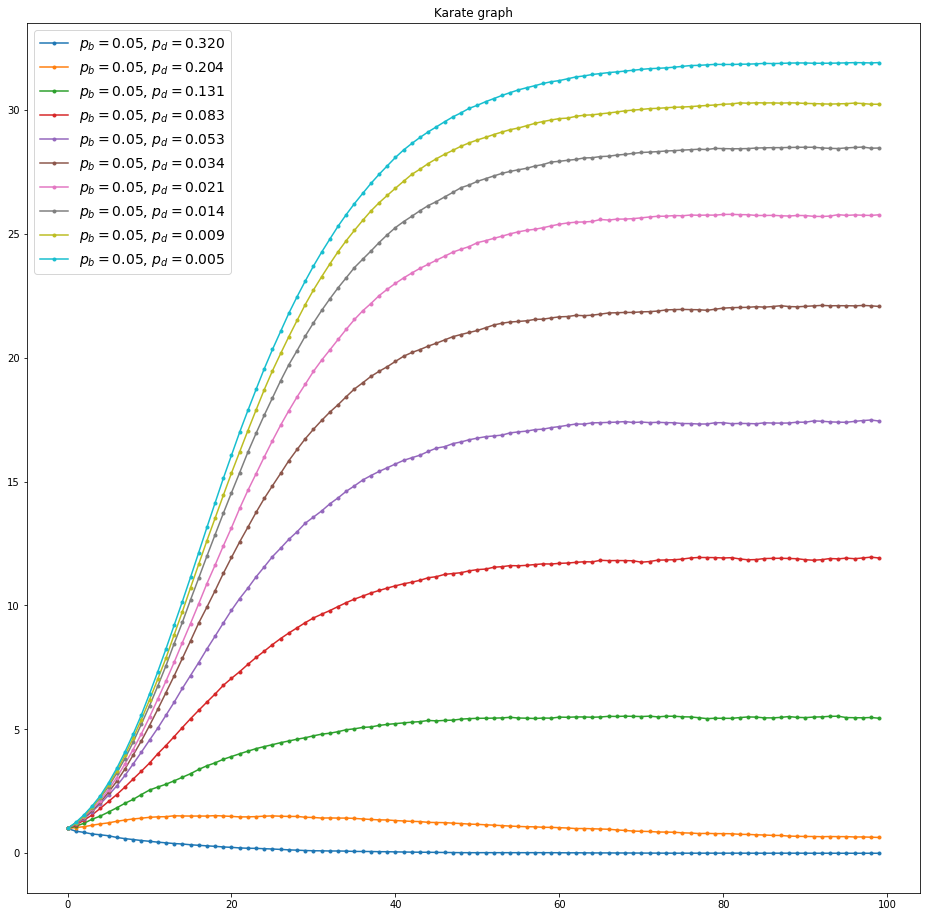

In [45]:
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_means[i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title("Karate graph")
plt.show()

Note that with the low $p_d$ value, the number of infected nodes reaches an average of around 17 (half of the total nodes) and remains stable.

In [46]:
df_p0_means = list()
for p0 in range(34):
    df_p0_means.append([dfs[i][dfs[i]["patient0"] == p0].iloc[:, 12:].mean(axis=0) for i in range(len(pdi))])

## Averages for runs for each $p_d$ value and each choice of vertex as the first infected

In [47]:
p0 = 0

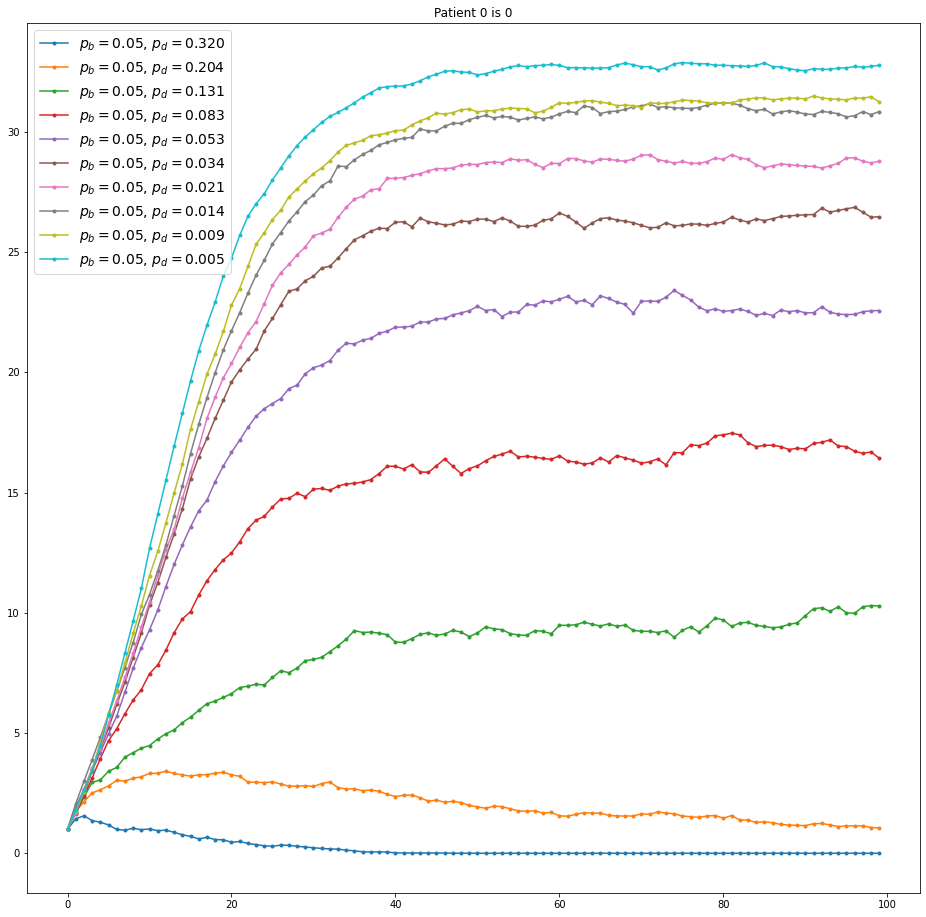

In [48]:
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

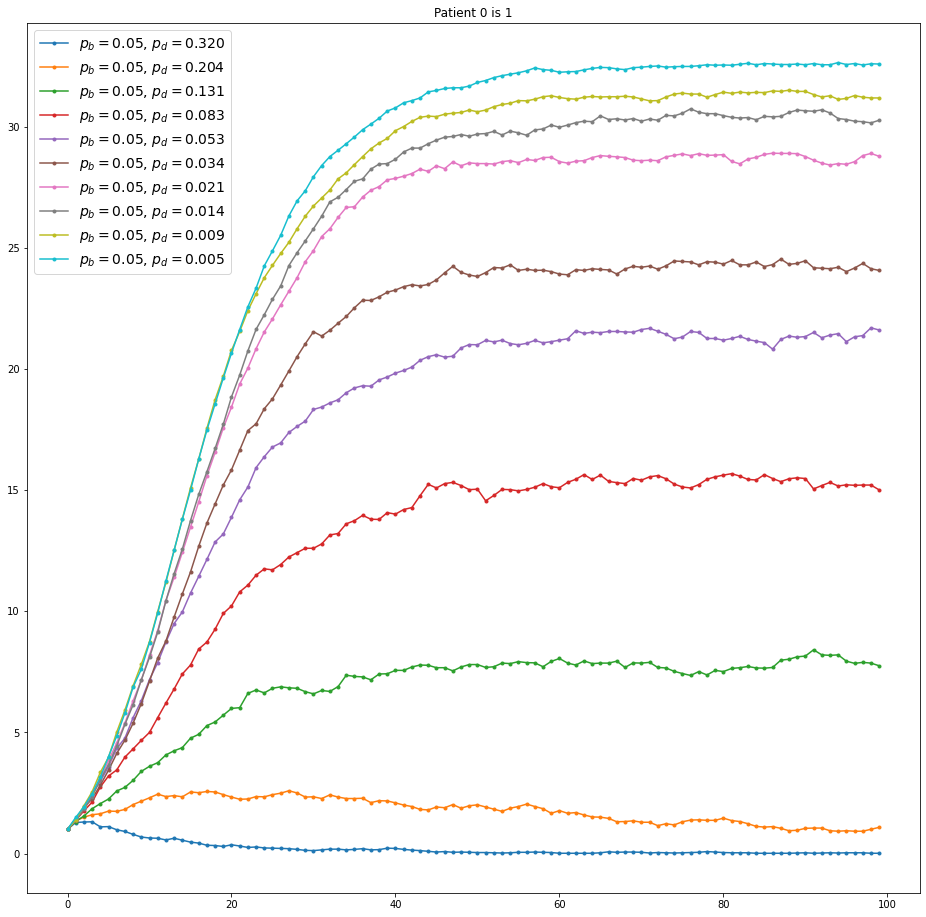

In [49]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

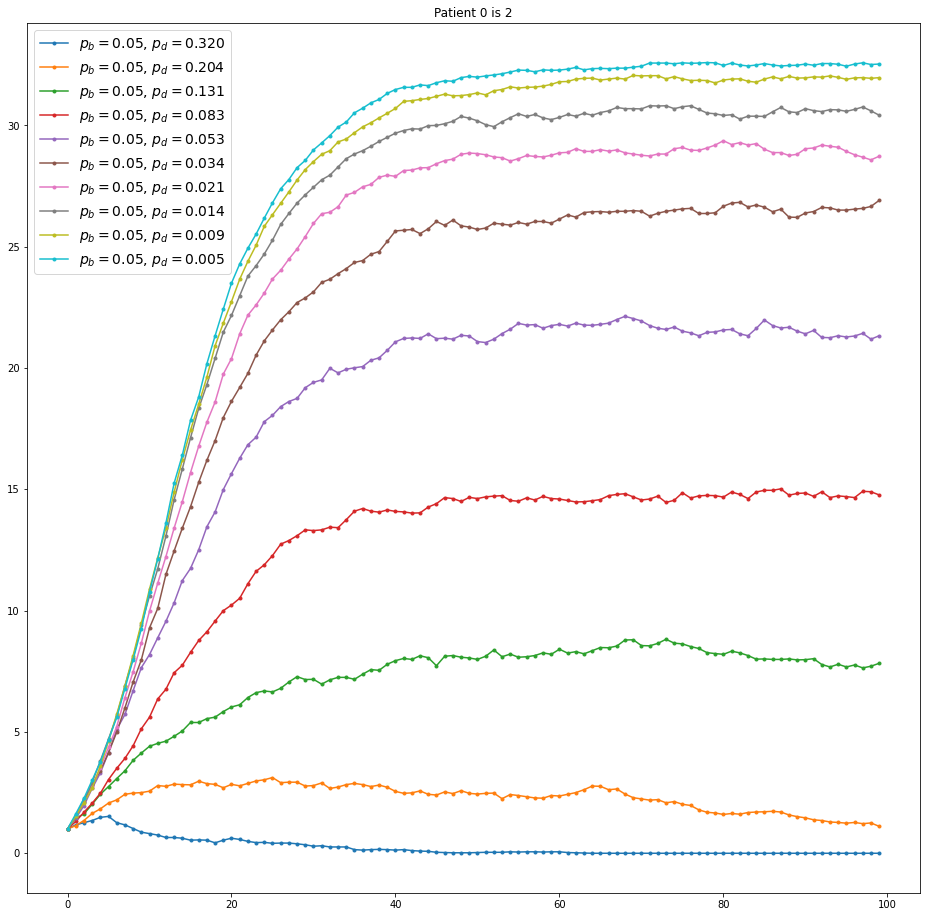

In [50]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

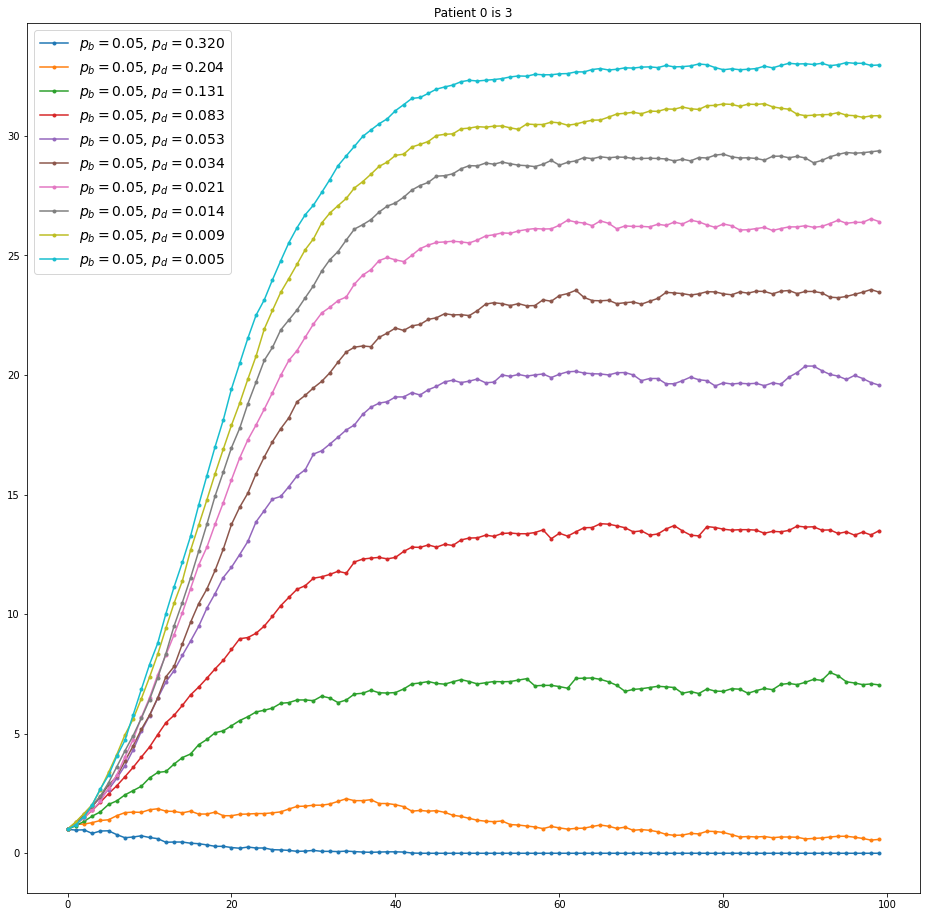

In [51]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

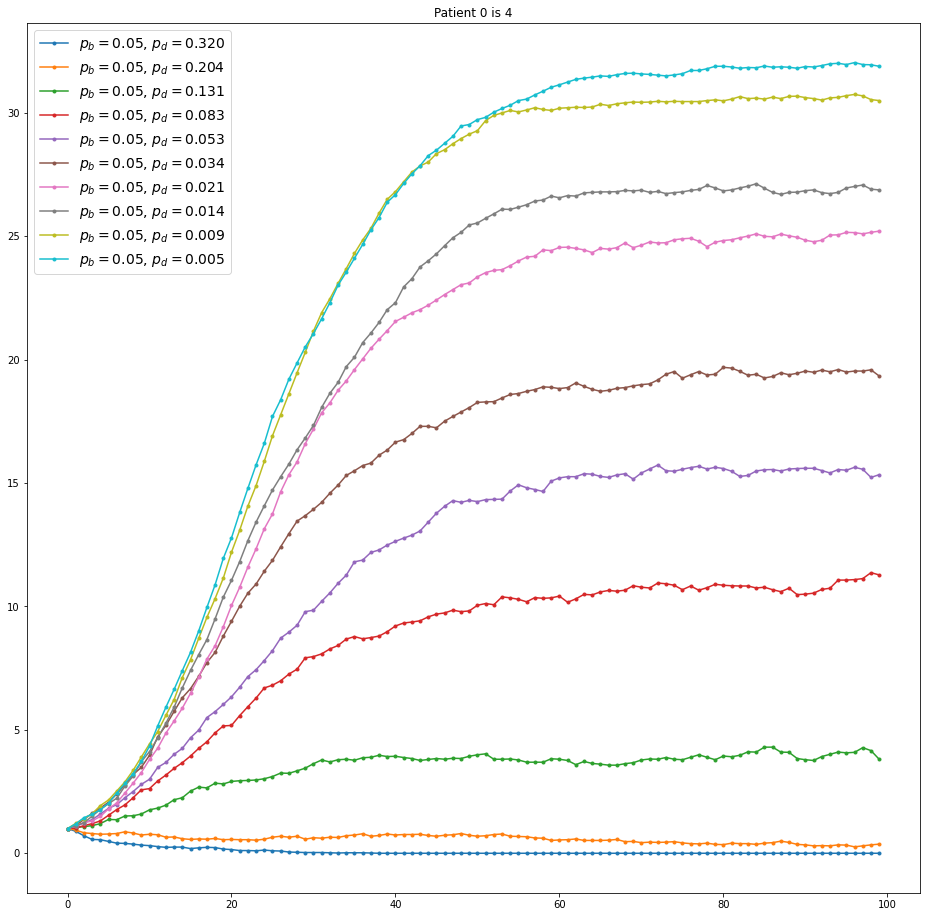

In [52]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

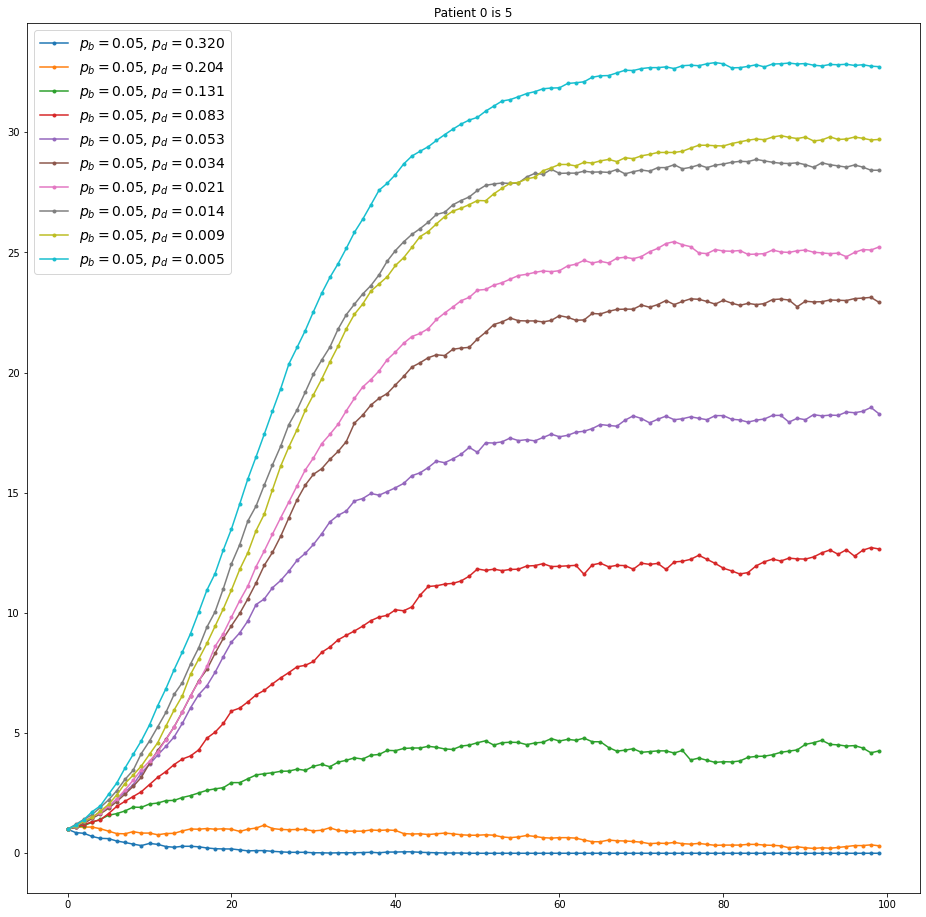

In [53]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

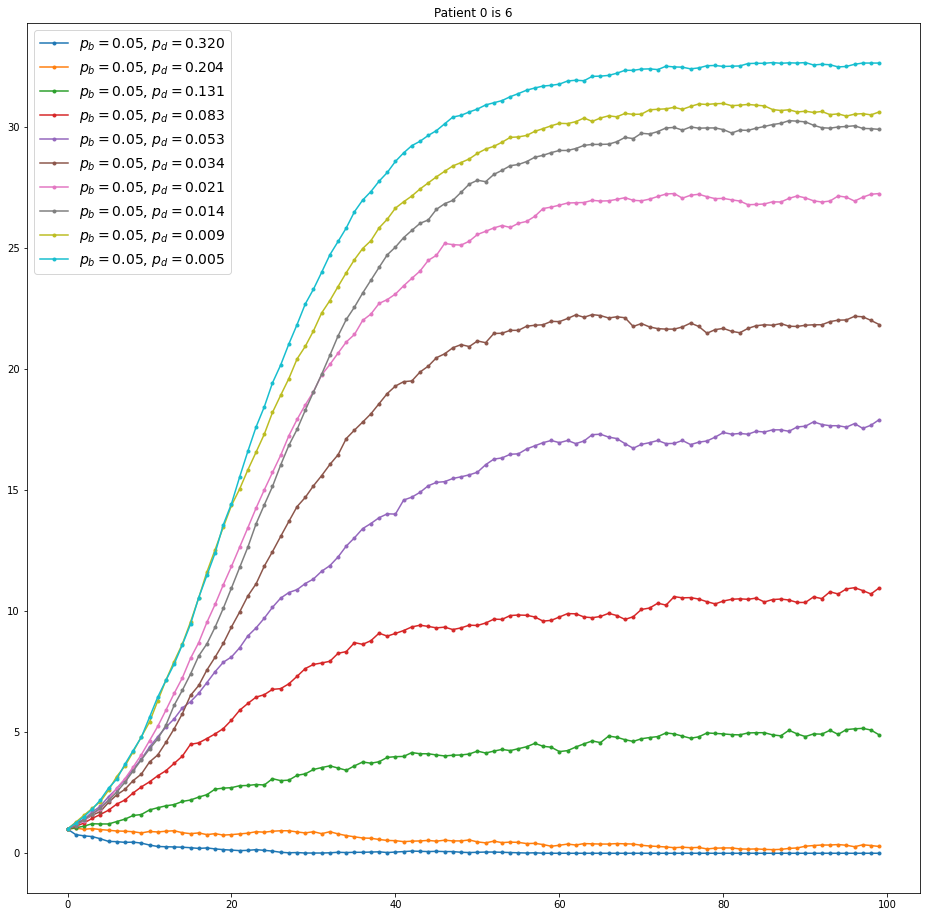

In [54]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

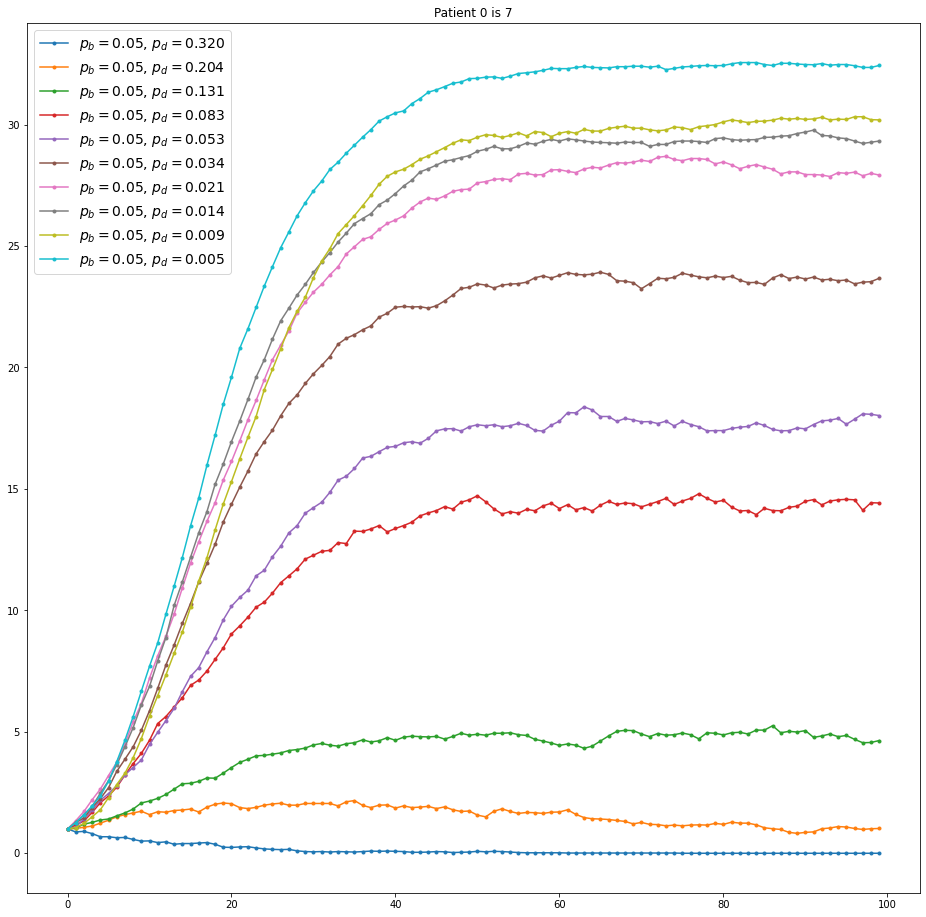

In [55]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

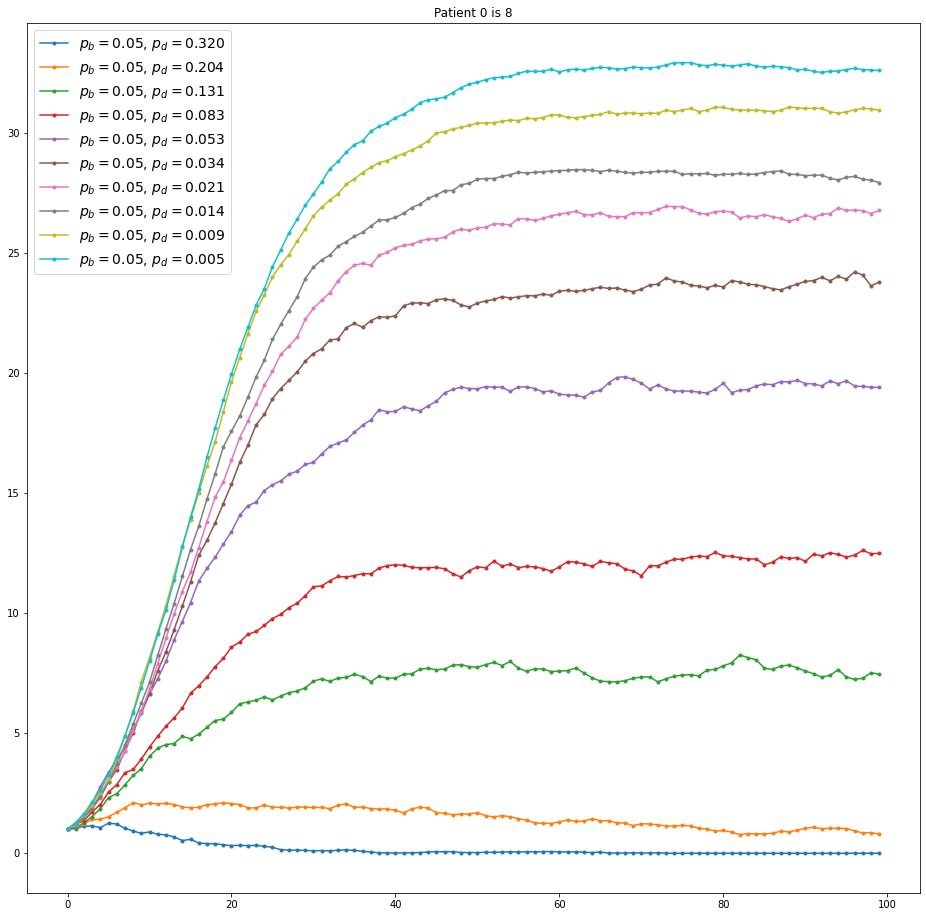

In [56]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

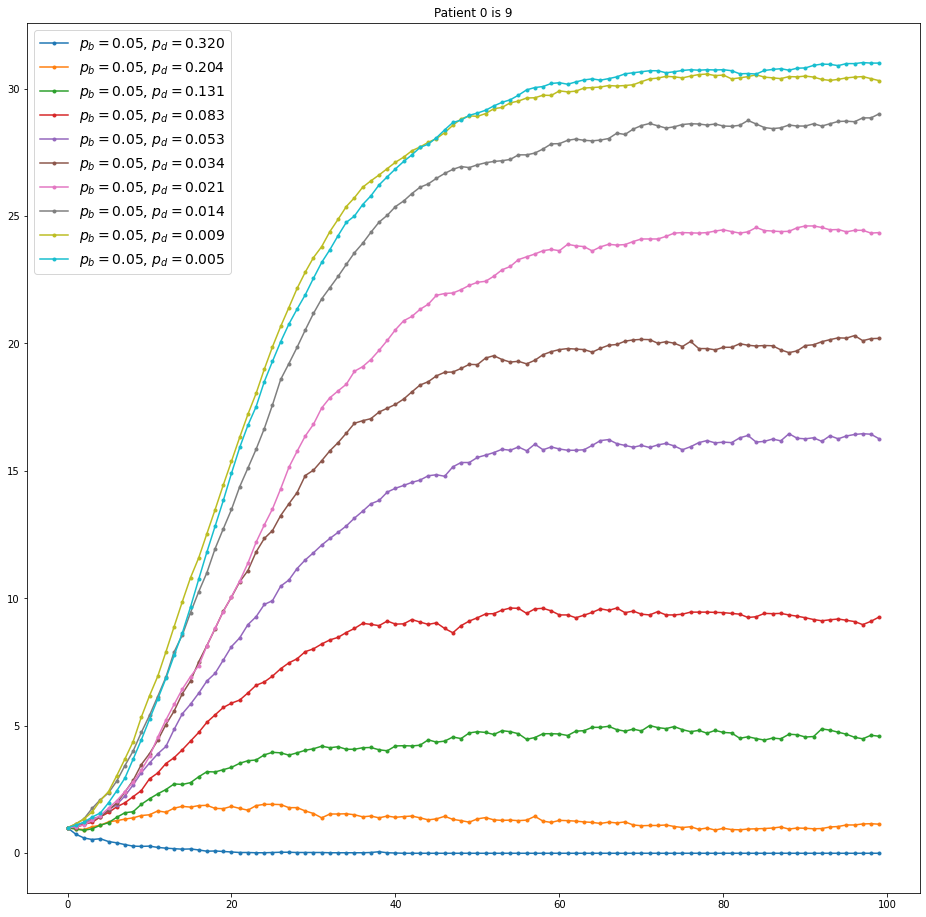

In [57]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

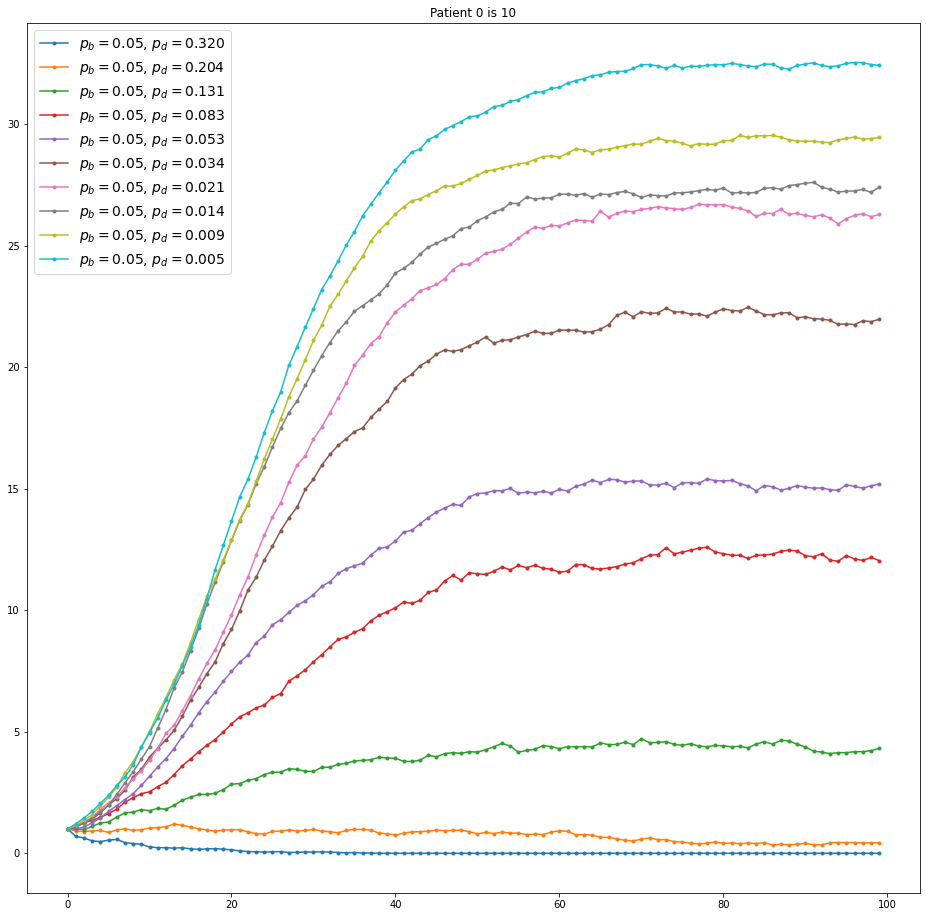

In [58]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

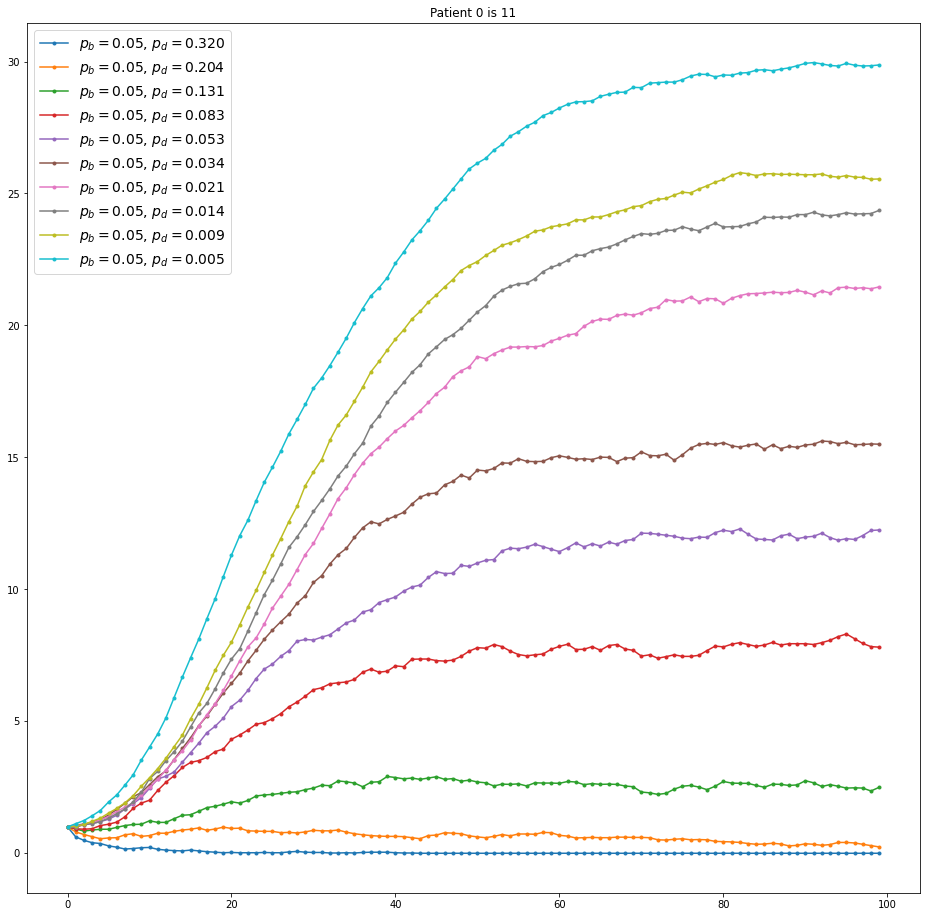

In [59]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

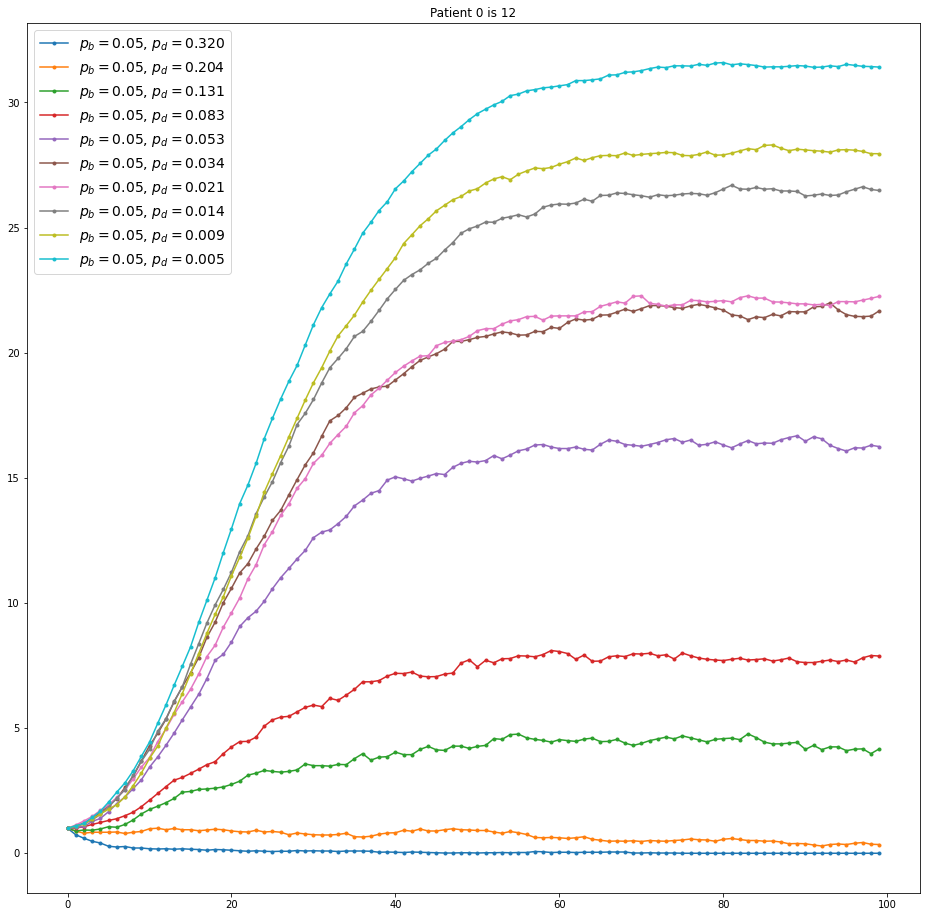

In [60]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

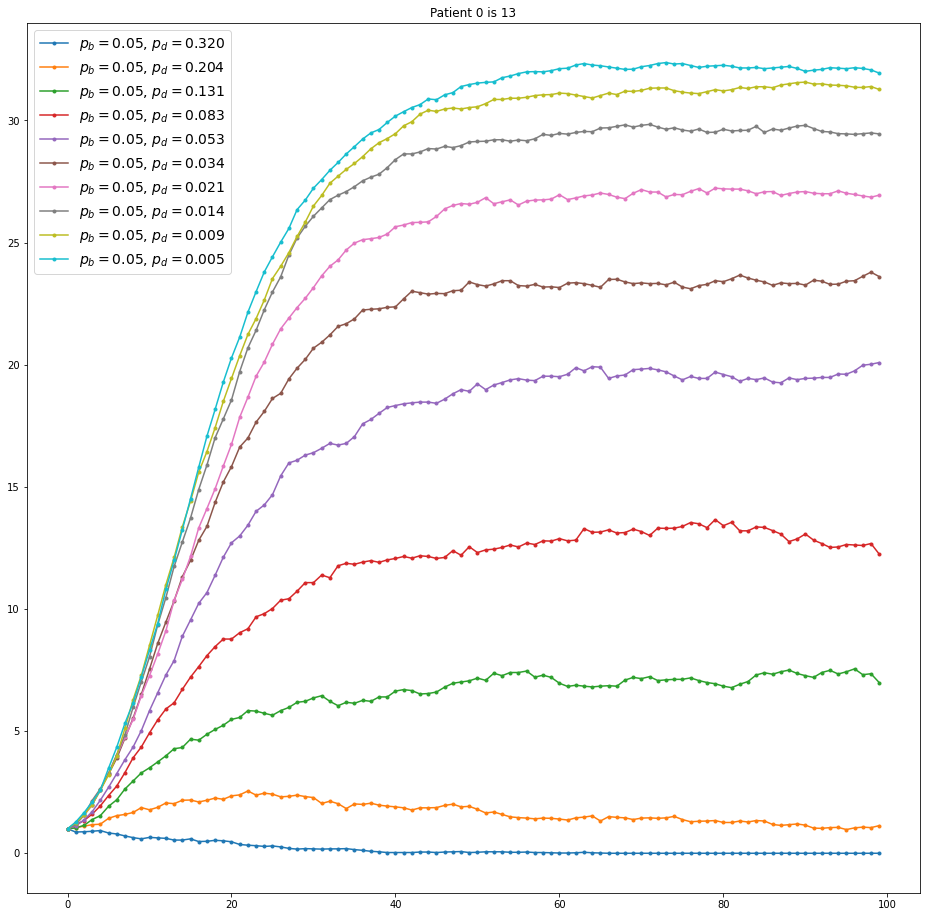

In [61]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

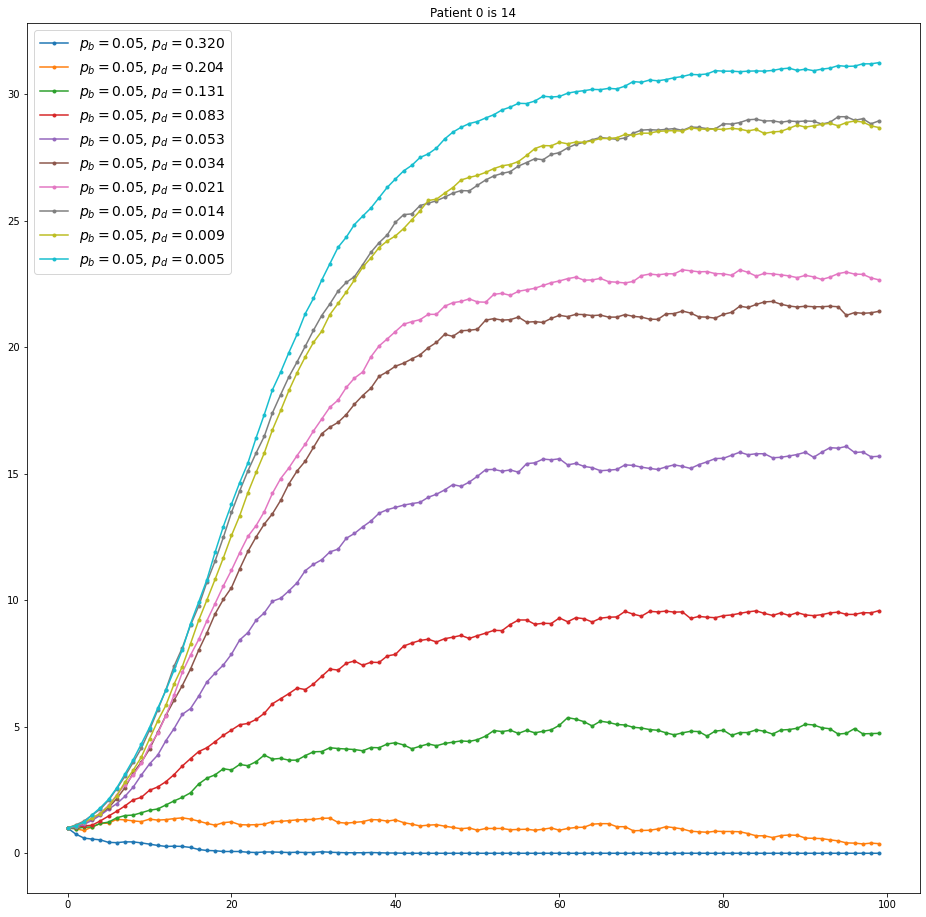

In [62]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

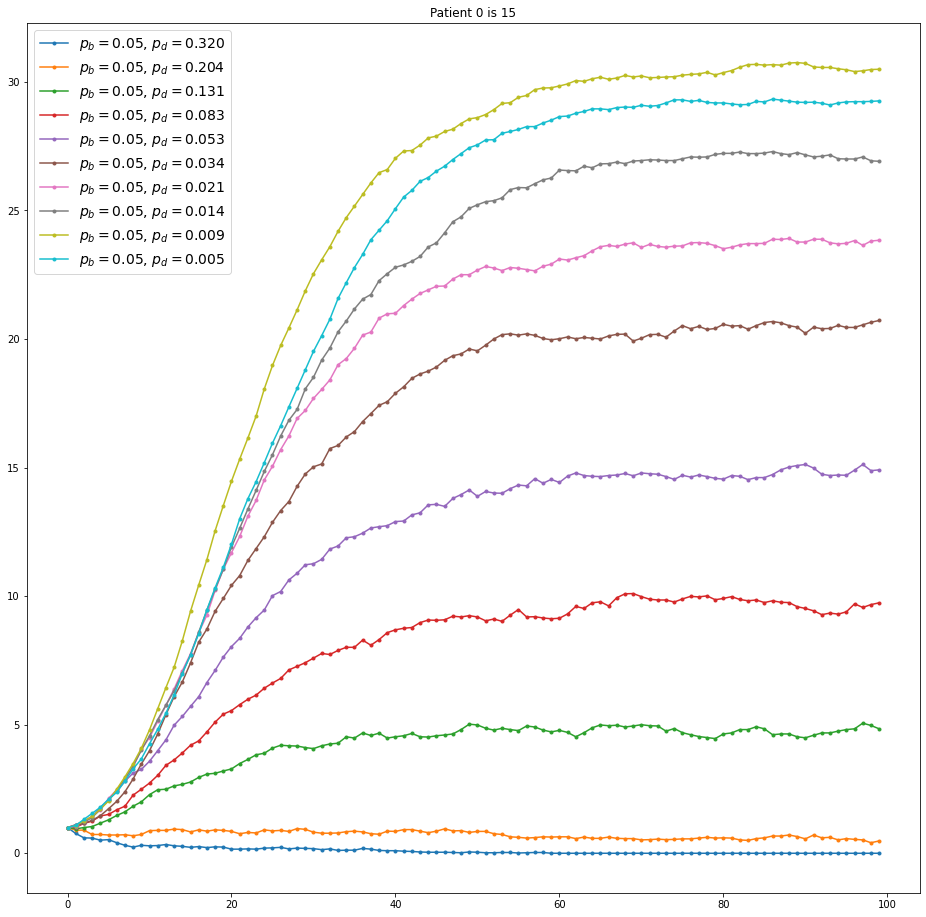

In [63]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

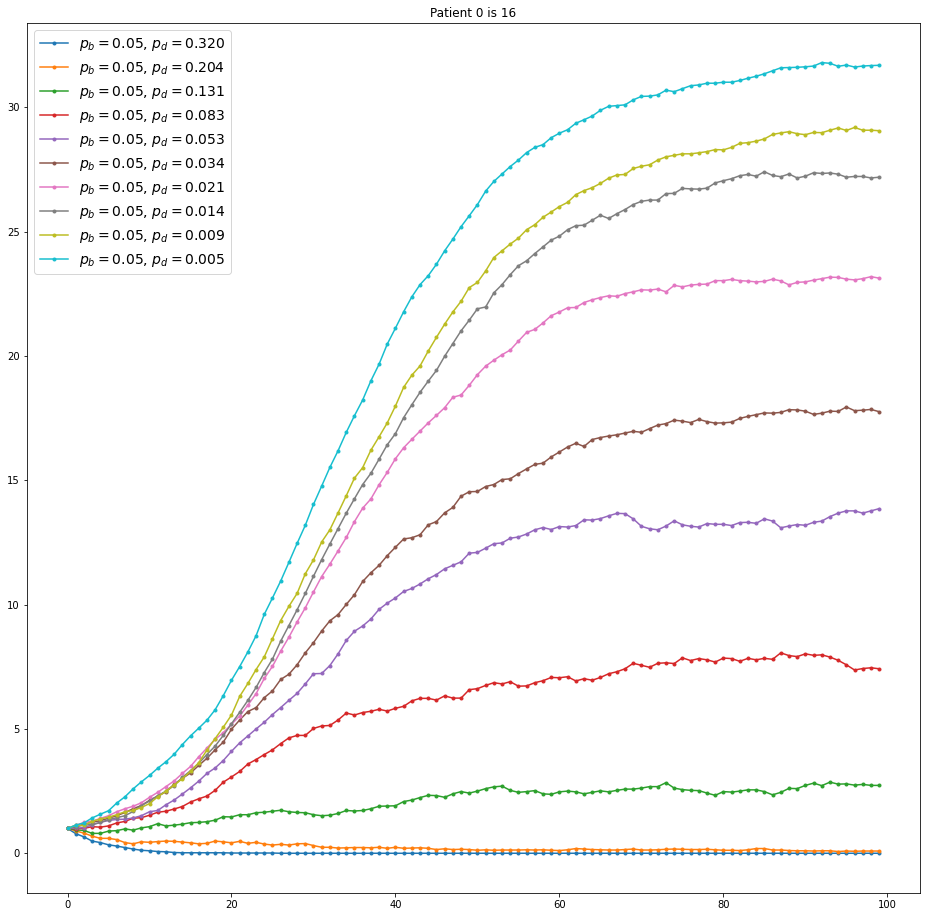

In [64]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

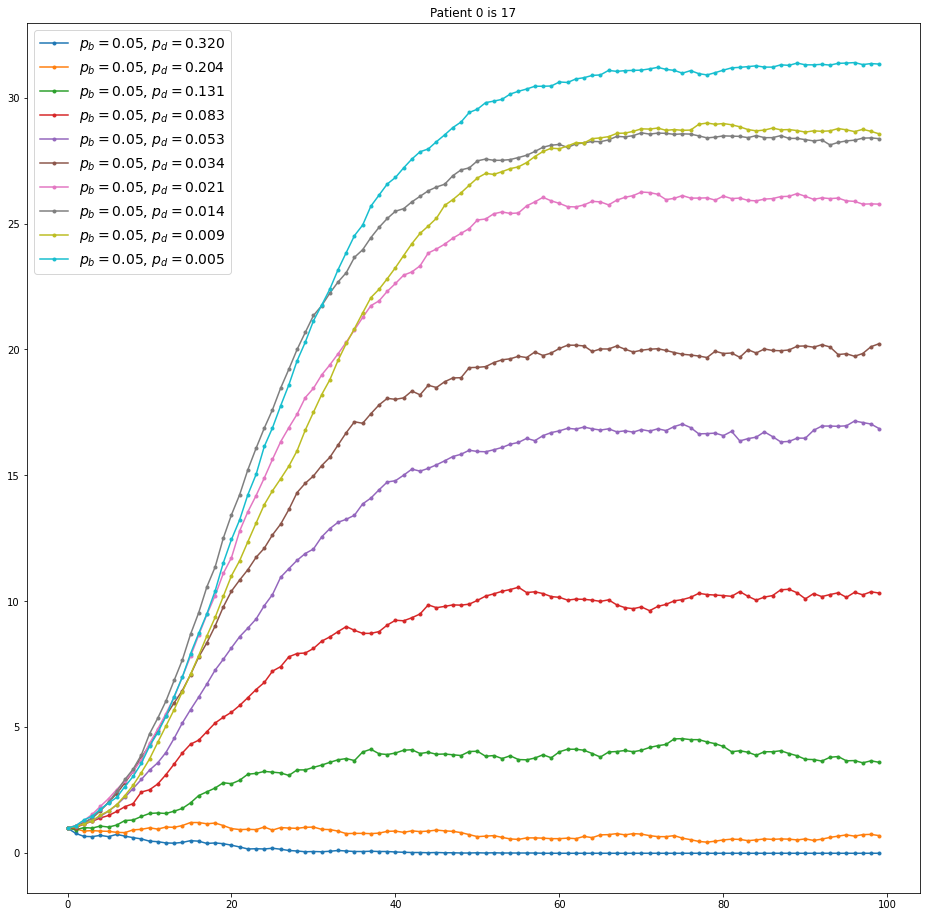

In [65]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

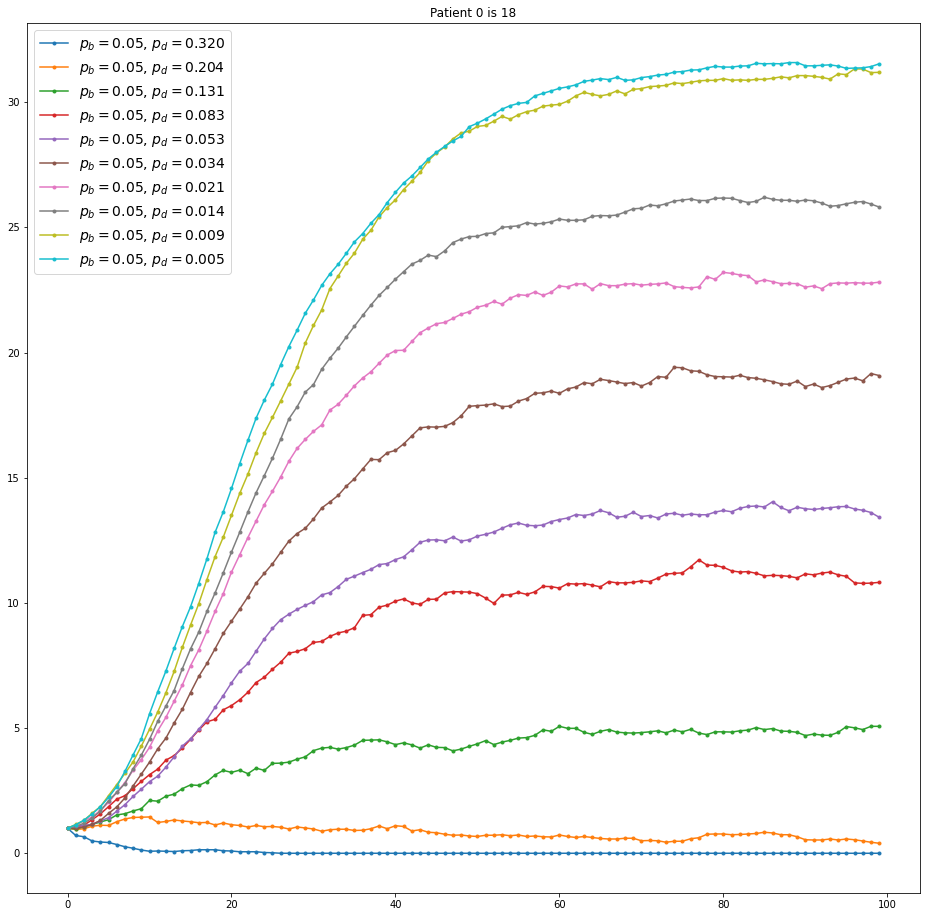

In [66]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

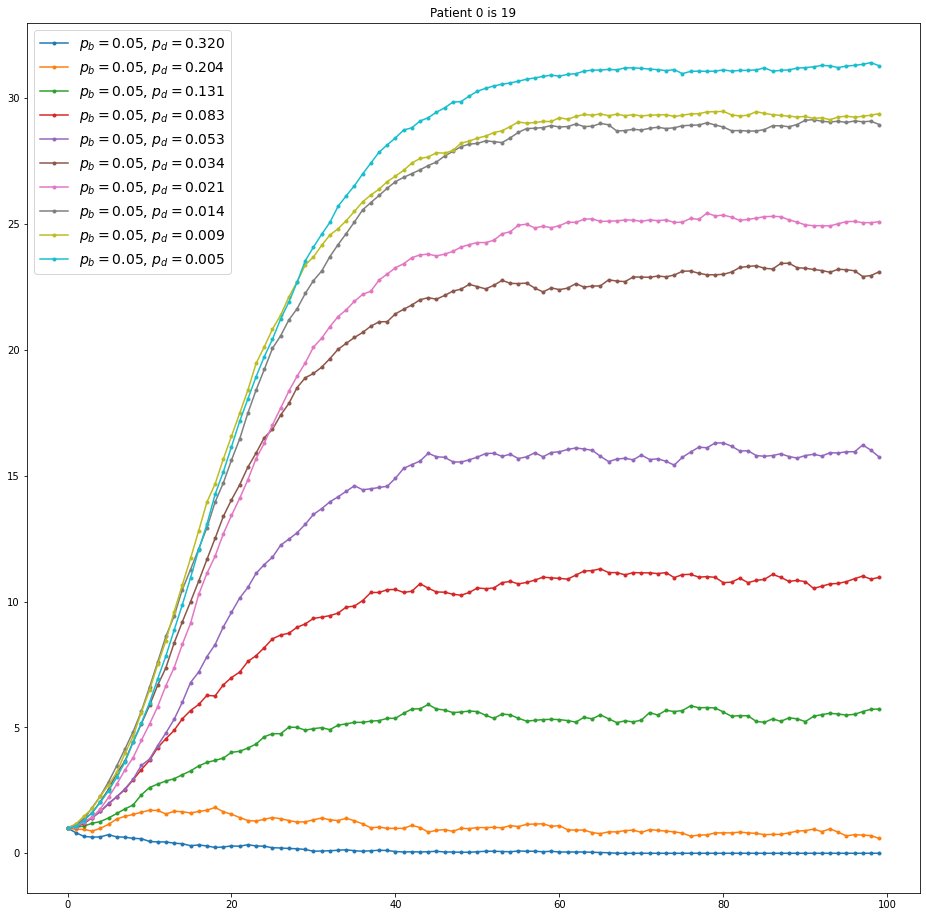

In [67]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

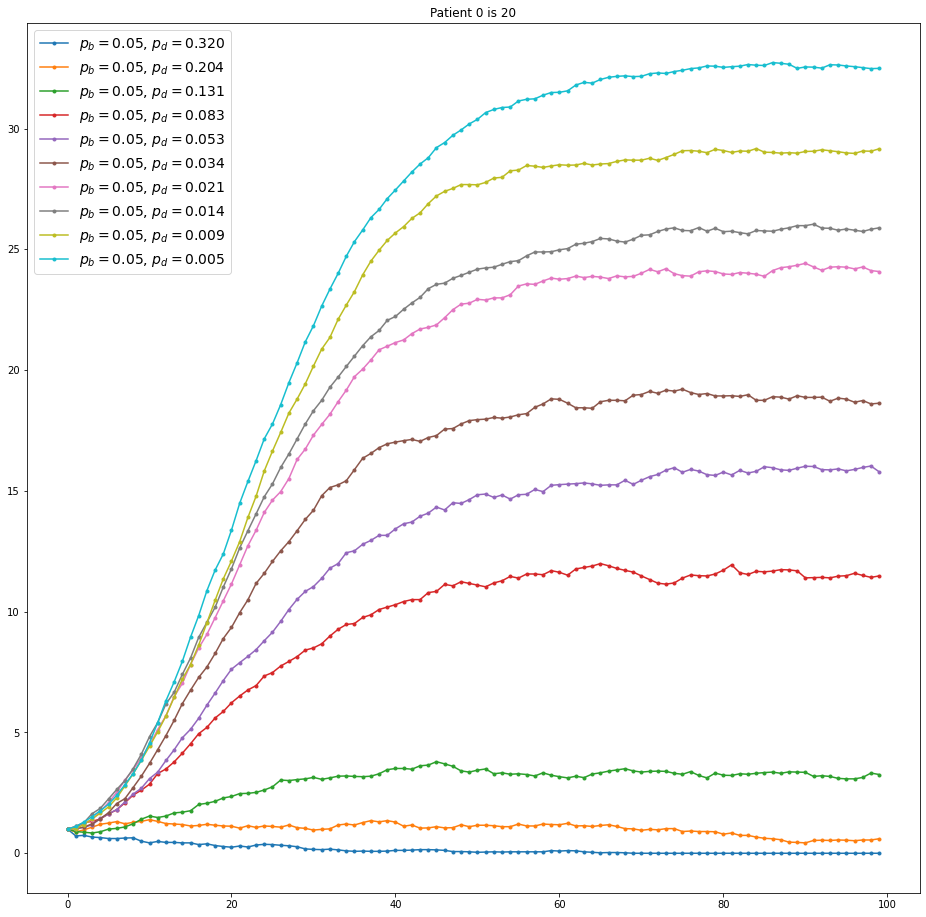

In [68]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

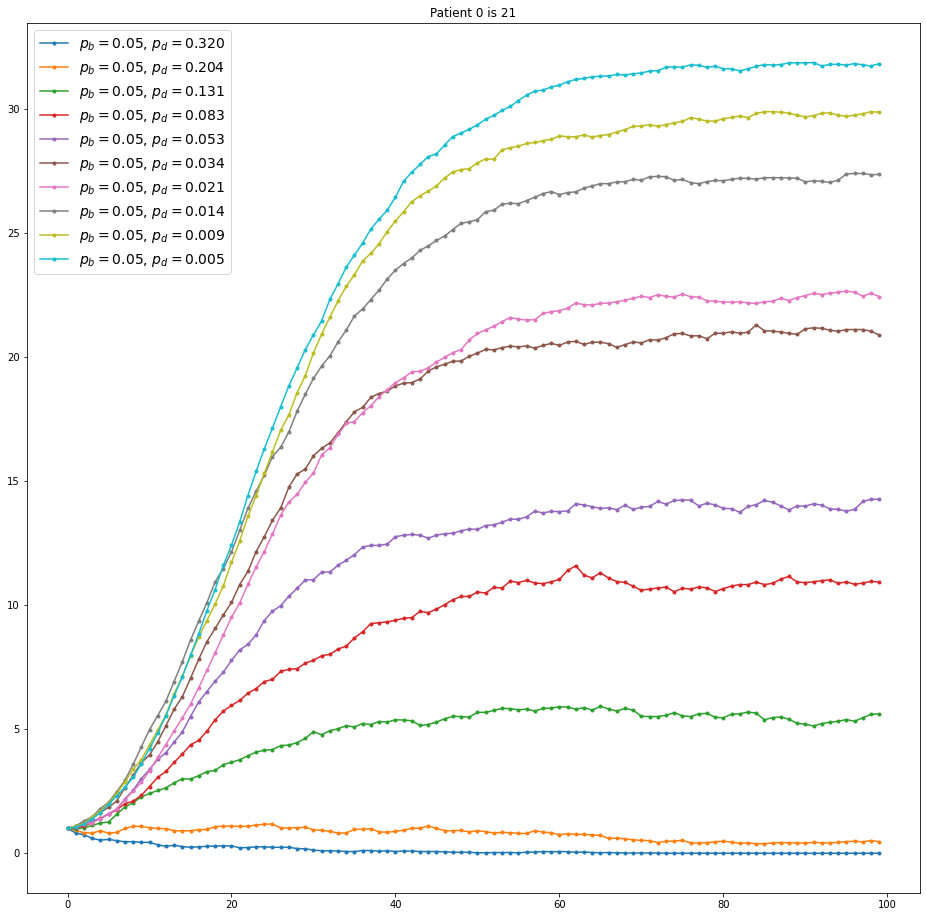

In [69]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

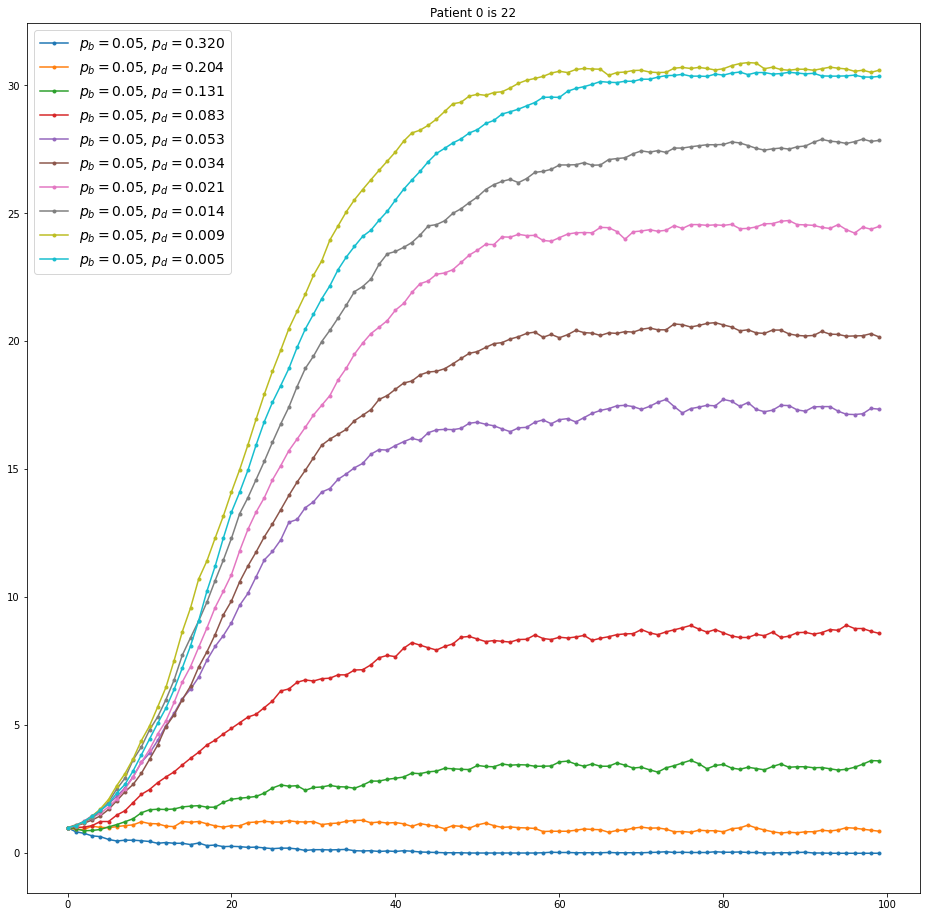

In [70]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

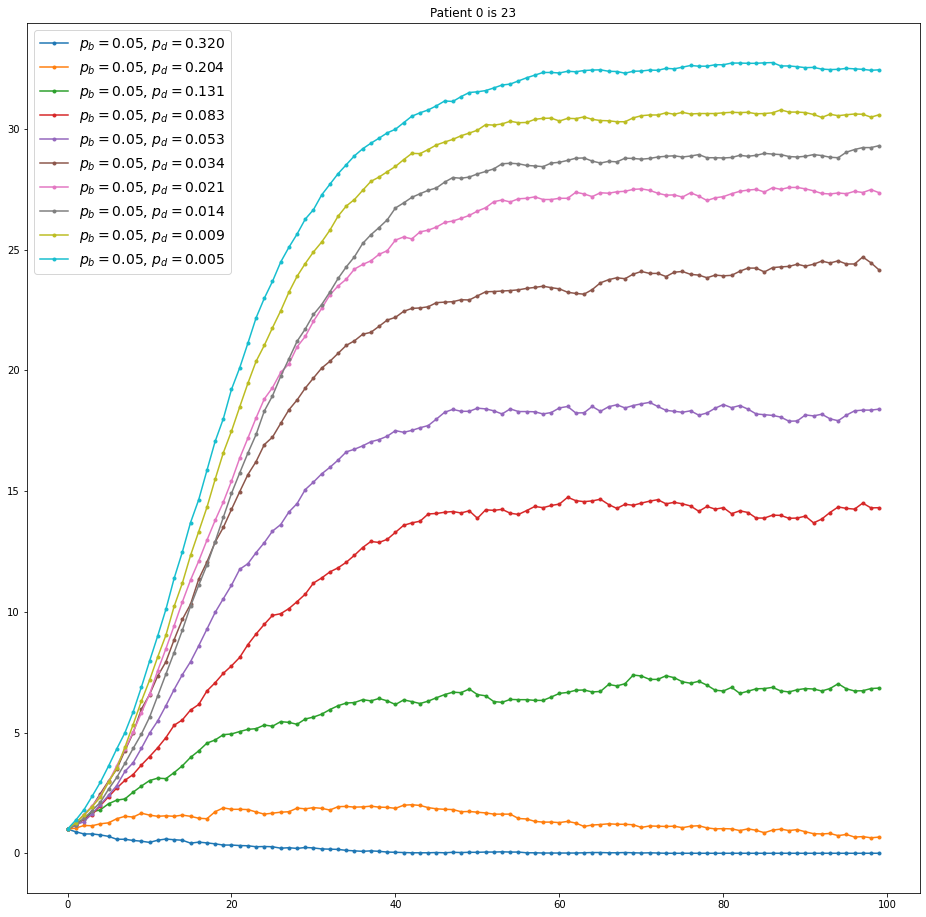

In [71]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

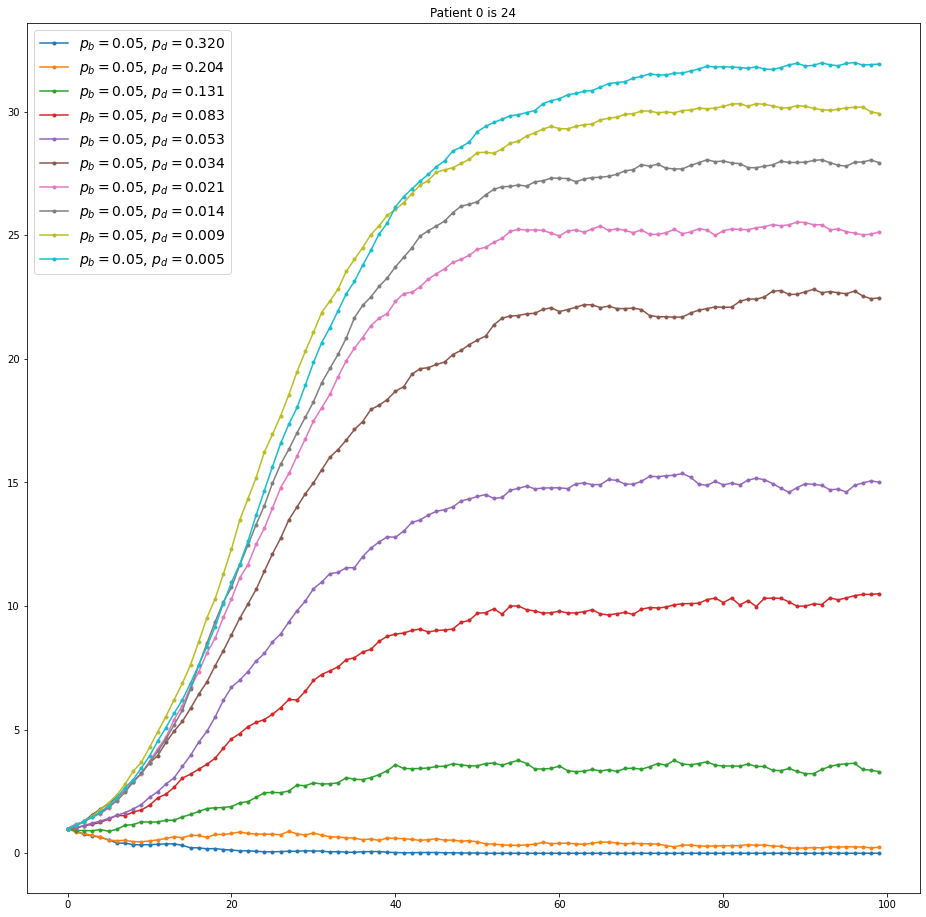

In [72]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

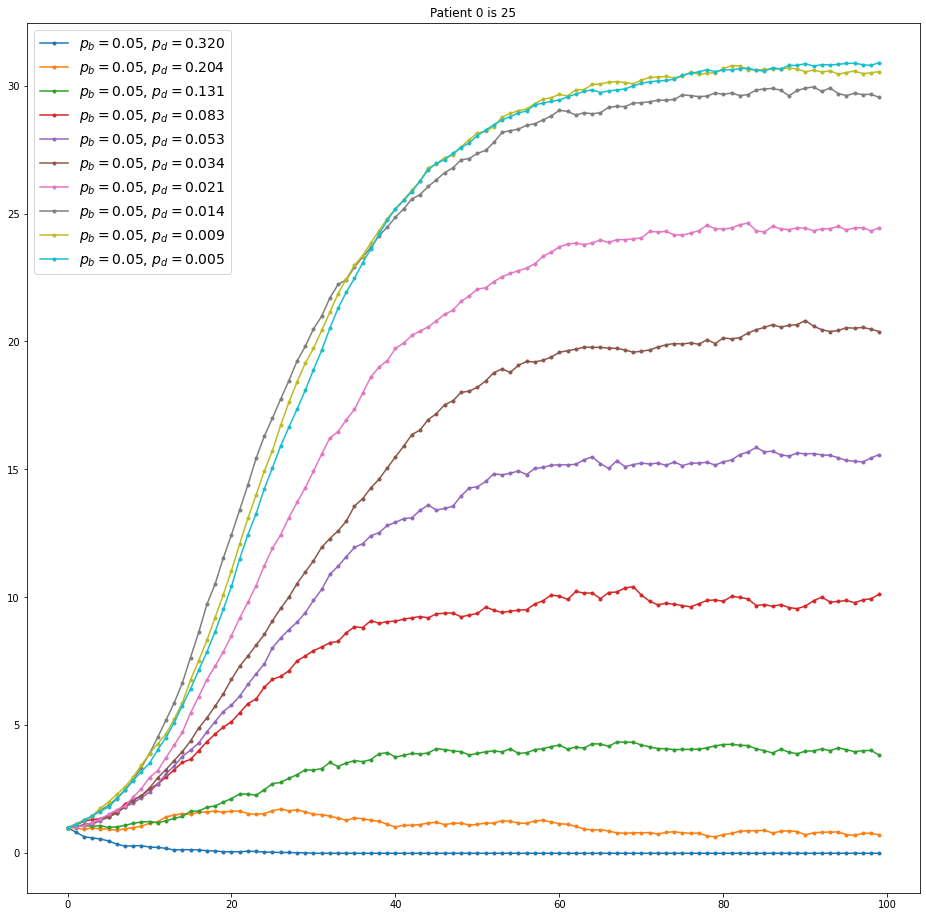

In [73]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

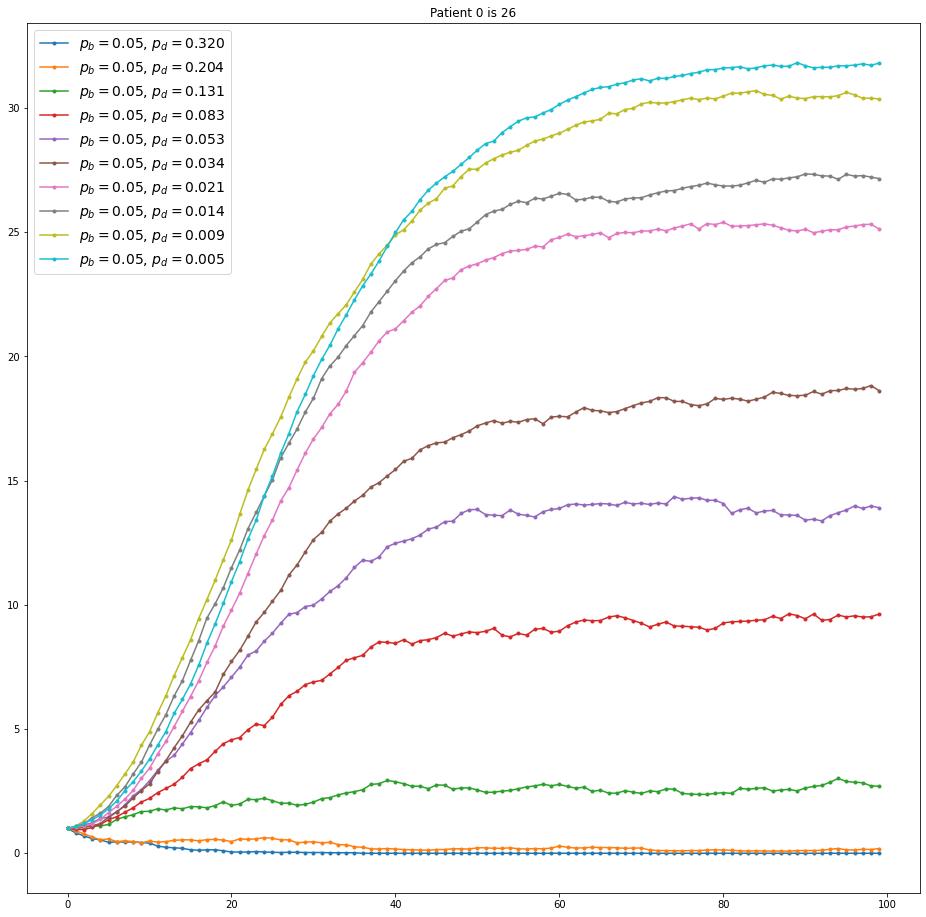

In [74]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

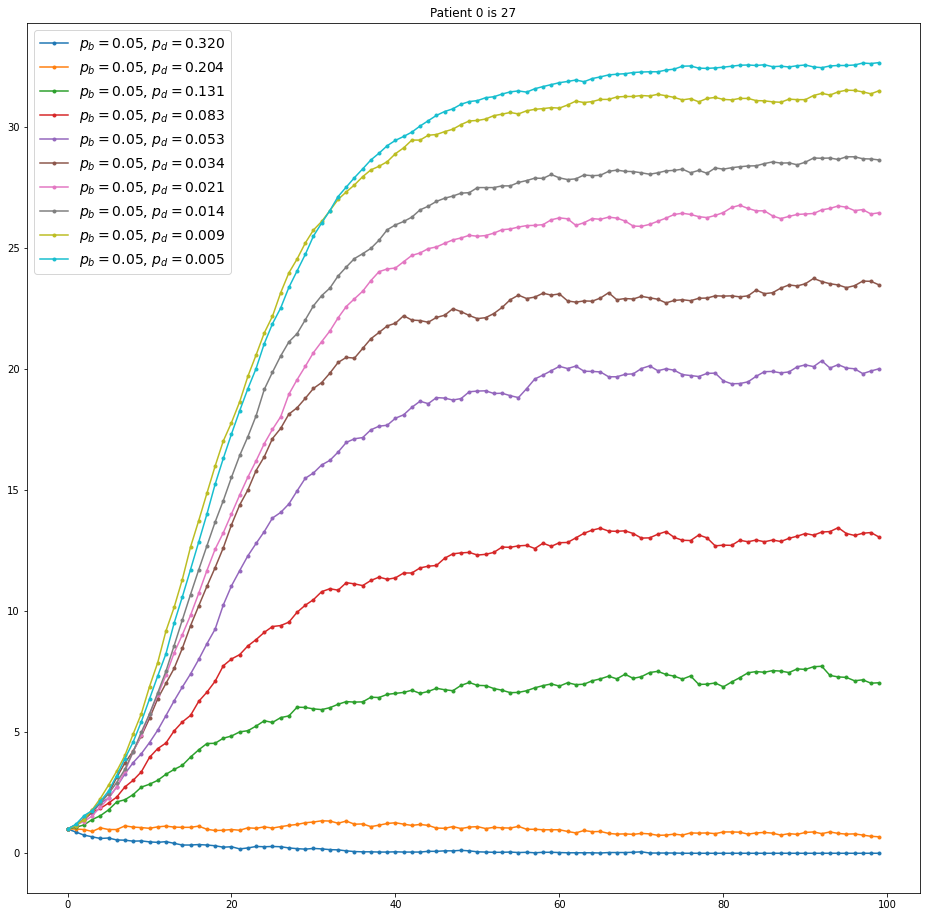

In [75]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

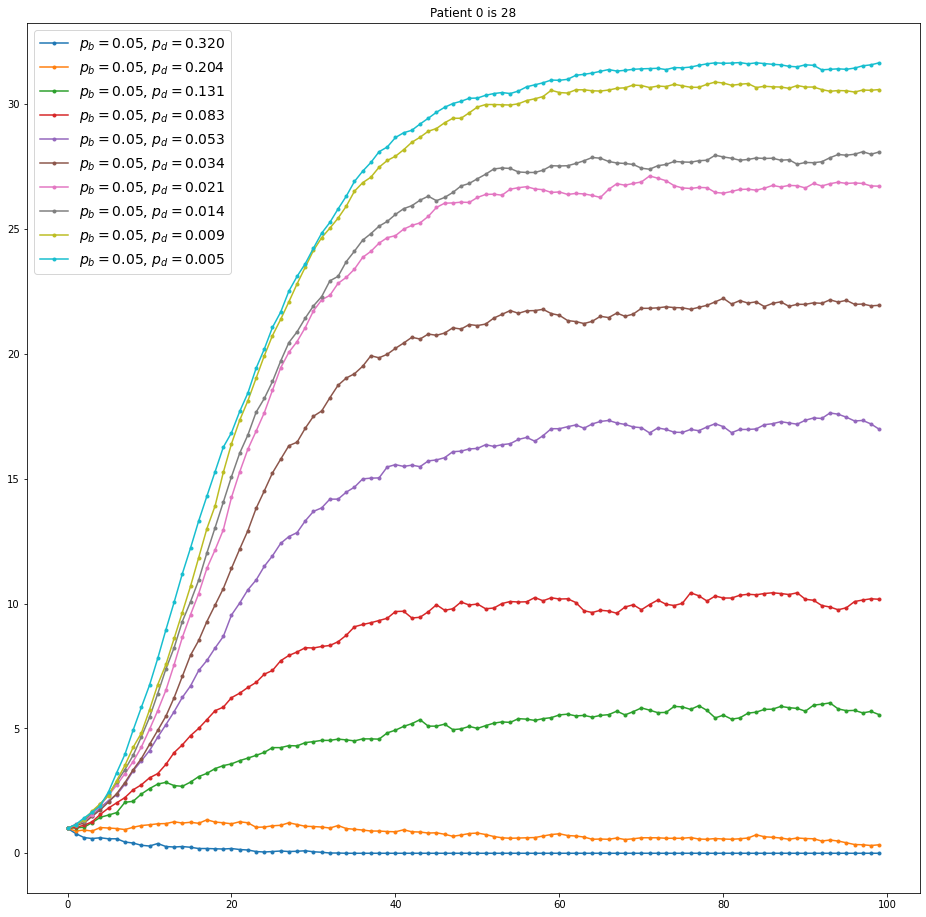

In [76]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

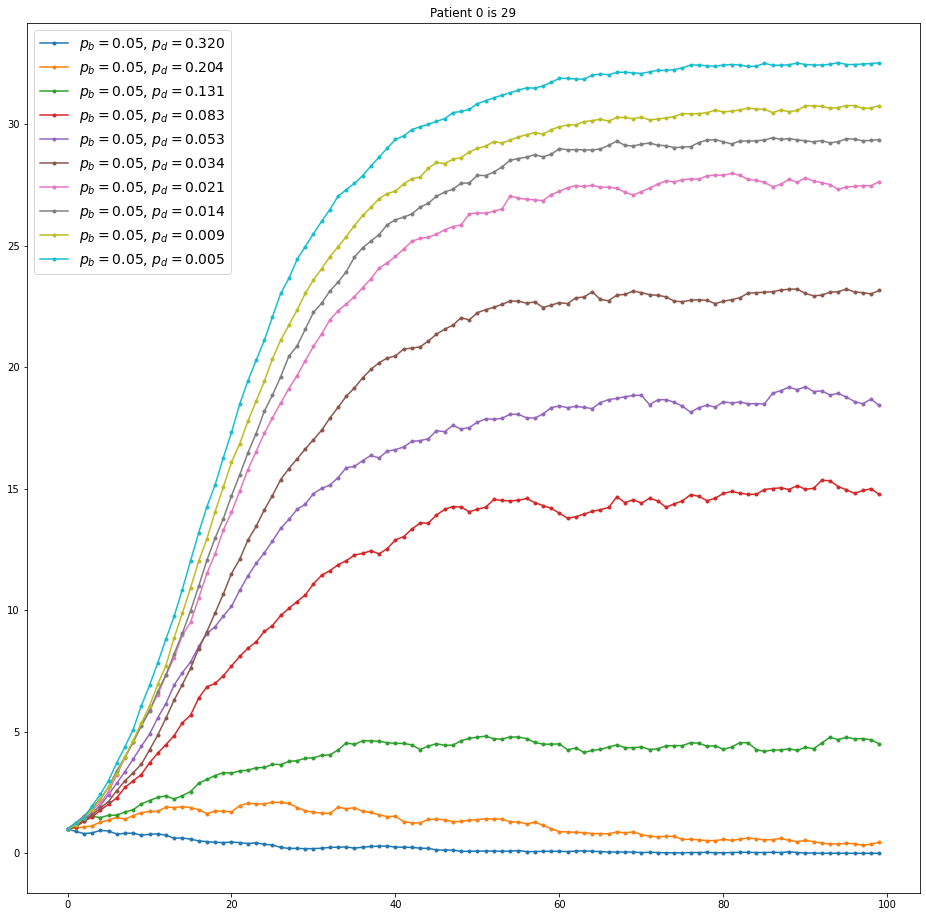

In [77]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

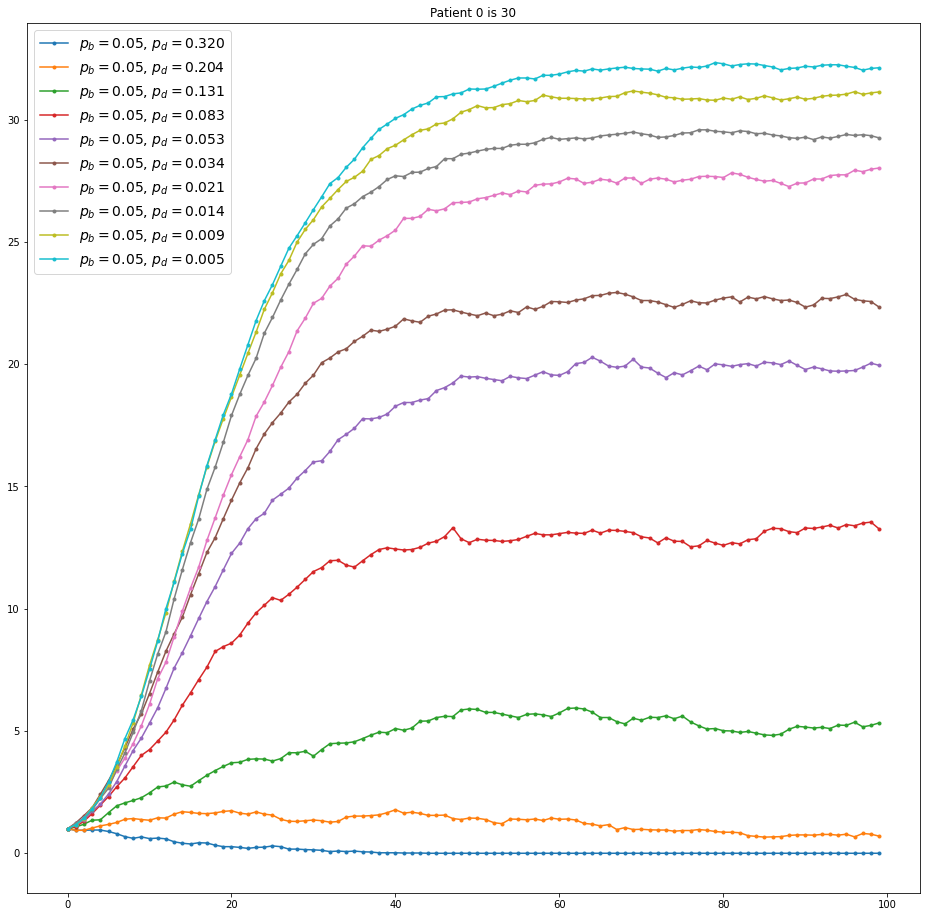

In [78]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

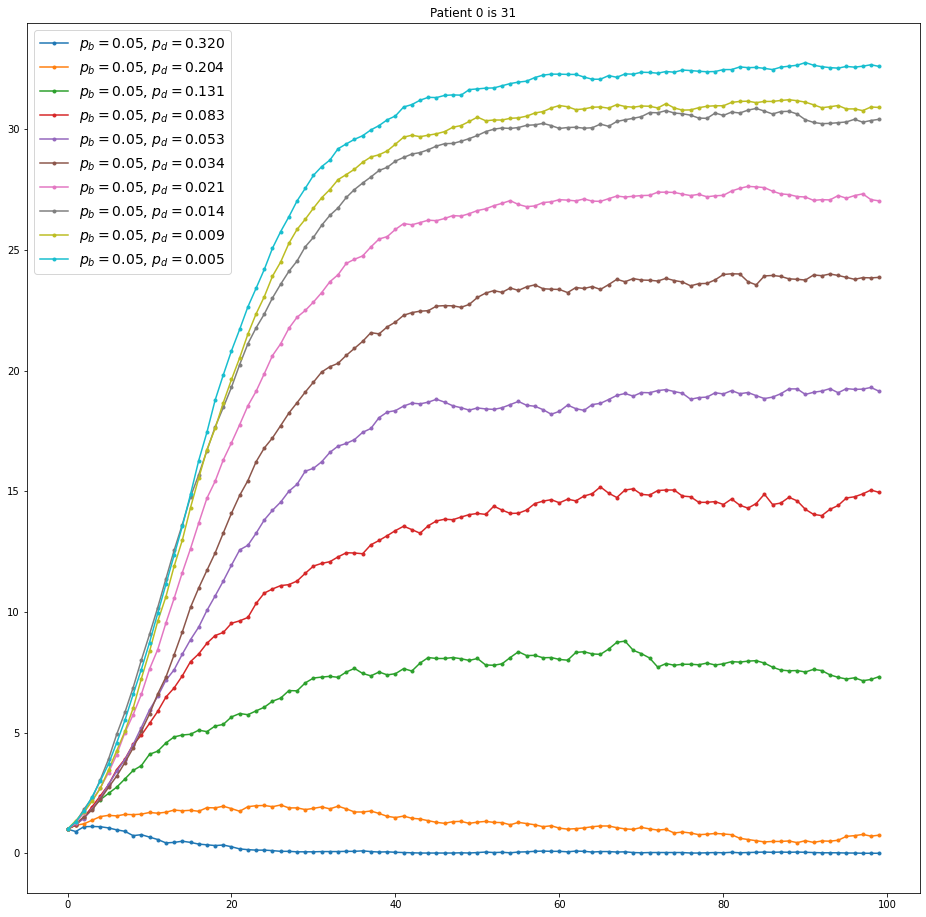

In [79]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

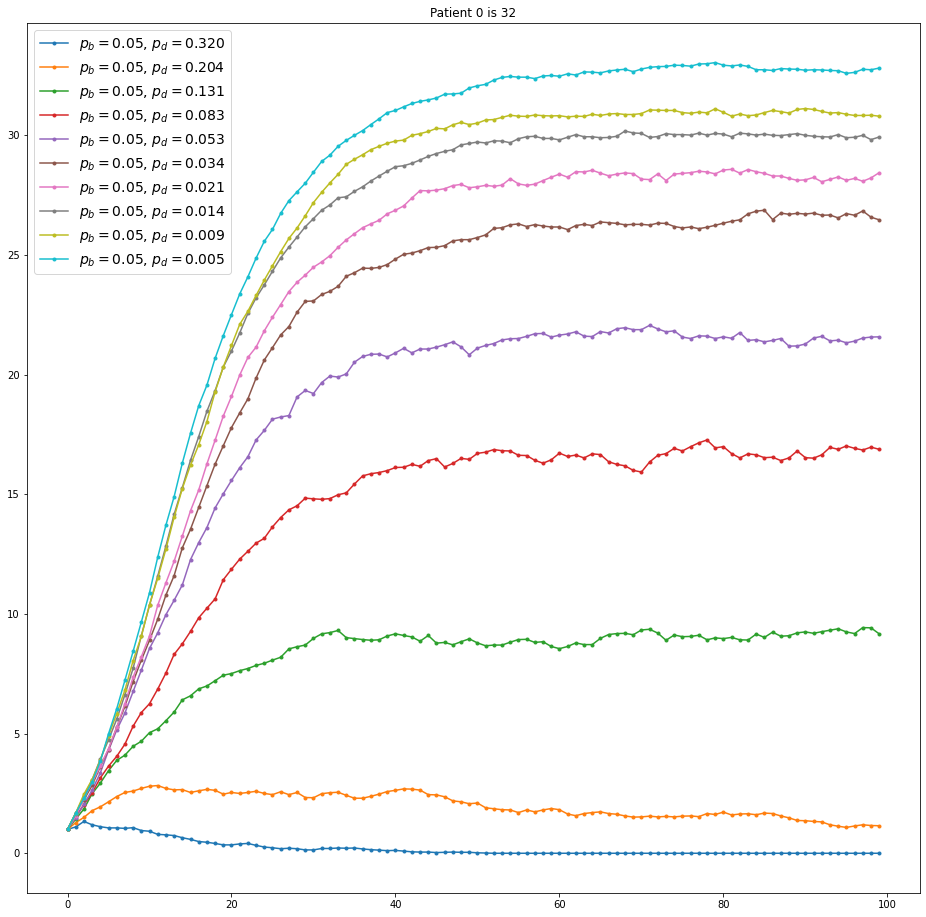

In [80]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()

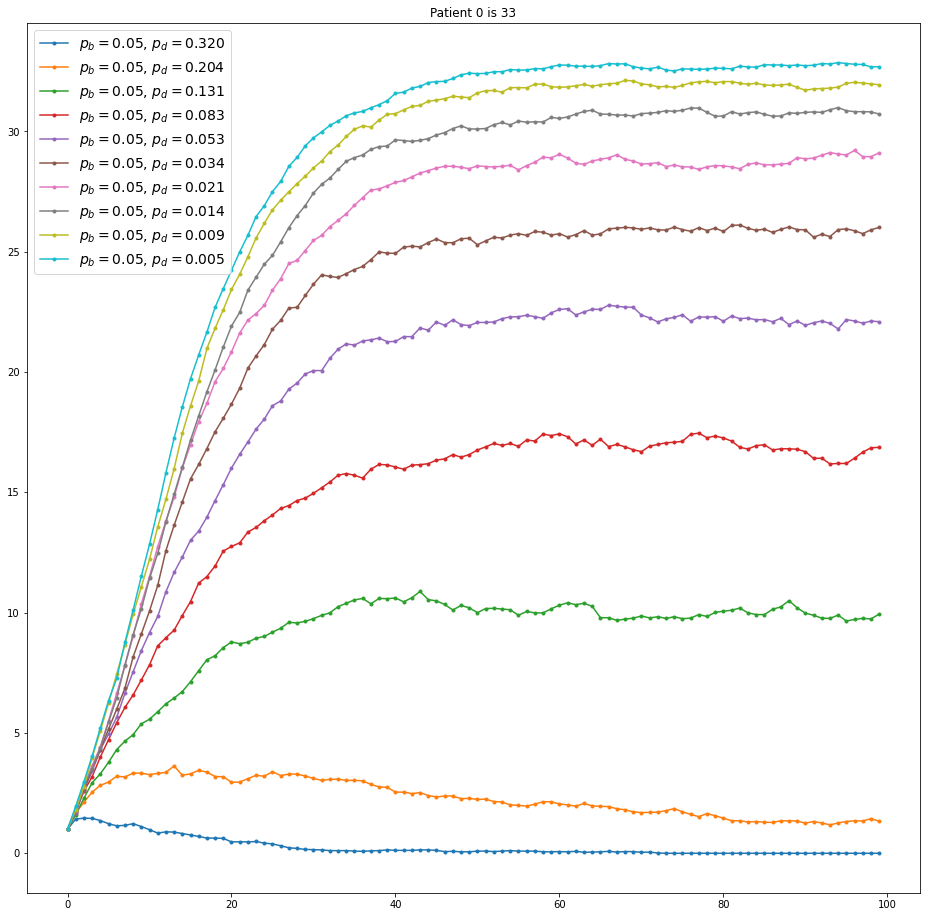

In [81]:
p0 += 1
fig, ax = plt.subplots(figsize=(16, 16))
for i in range(0, len(pdi), 2):
    ax.plot(X, df_p0_means[p0][i], marker=".", label=names[i])
ax.legend(prop={"size": 14})
ax.set_title(f"Patient 0 is {p0}")
plt.show()